# Moving a file from S3 to local jupyter notebook server



Put the files in an S3 bucket in a central place and have notebooks download the file to the notebook server.  



High-level Steps:
1. Add the file to the S3 repository we use to keep the imported python libraries.
2. Notebooks using the library will need to download the file from S3.


### Adding the file to the S3 repository

 Upload the file to an S3 repository using the AWS Console.  For example the repository  	https://fmm-sagemaker-12-31-19.s3.us-east-2.amazonaws.com/python-install-packages/
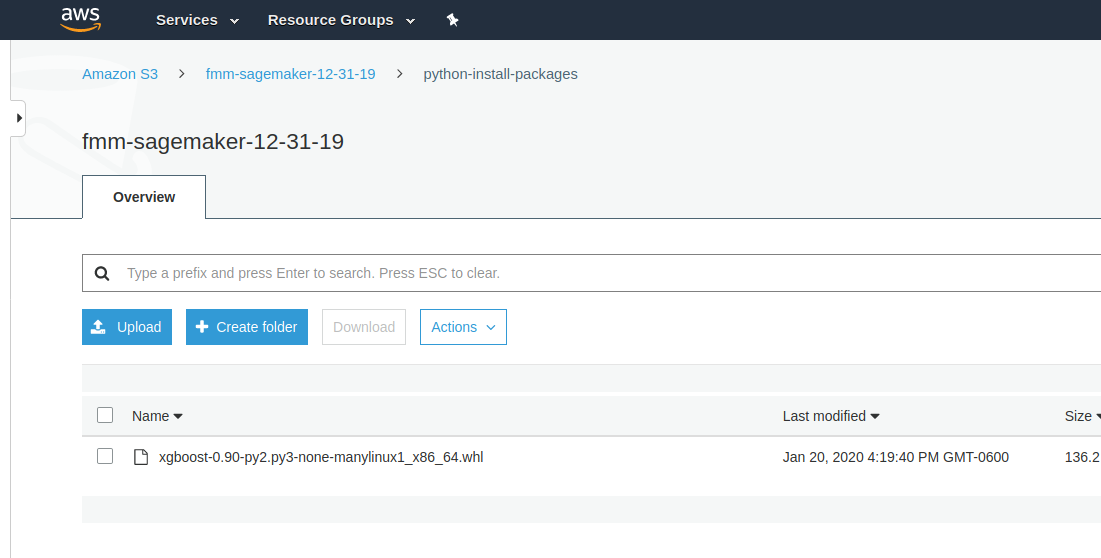

### Use the following code snippet in your notebook to: 
1. Specify the location of the file on S3 (bucket, folder, file name)
2. Use boto library to download the file from S3 onto the notebook server.



In [7]:
import boto3
bucket = 'fmm-sagemaker-12-31-19' # put your s3 bucket name here
temp_folder = 'temp-files/'
file_name = "xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl"
#pull from s3
s3 = boto3.client('s3').download_file(bucket,temp_folder+file_name,file_name)



TypeError: download_file() missing 1 required positional argument: 'Filename'

In [8]:
import boto3
def download(filename,dest_filename = None,bucket='fmm-sagemaker-12-31-19',prefix='temp-files/' ):
    s3 = boto3.resource('s3')
    my_bucket = s3.Bucket(bucket)
    if not prefix.endswith('/'):
        prefix += '/'
    if dest_filename == None:
        dest_filename = filename
    #pull from s3
    my_bucket.download_file(prefix+filename,dest_filename)

In [11]:
import os
fns=['temp_processed_data_2020-06-09_16-53-08unsync.csv']
local_dir = 'data/'
os.makedirs(local_dir, exist_ok=True)
for fn in fns:
    download(filename=fn,prefix='alajoki concrete', dest_filename=local_dir+fn)

In [3]:
ft('aws-greengrass-core-sdk-python-master.zip')

In [2]:
def write_to_s3(fobj, bucket, key):
    region = boto3.Session().region_name
    return boto3.Session(region_name=region).resource('s3').Bucket(bucket).Object(key).upload_fileobj(fobj)

def upload_to_s3(bucket, key, filename):
    fobj=open(filename, 'rb')
    url = 's3://{}/{}'.format(bucket, key)
    print('Writing file {} to {}'.format(filename, url))
    write_to_s3(fobj, bucket, key)

In [13]:
#Better routine for downloading a portion of S3

import boto3
import os

def download_dir(bucket,prefix, dest_path):
    s3 = boto3.resource('s3')
    my_bucket = s3.Bucket(bucket)
    if not prefix.endswith('/'):
        prefix += '/'
    if not dest_path.endswith('/'):
        dest_path += '/'
    objects = my_bucket.objects.filter(Prefix=prefix)

    for obj in objects:

        s3path, filename = os.path.split(obj.key)
        if s3path.startswith(prefix):
            path = s3path[len(prefix):] 
        else:
            path = ""

        if filename =="":
            
            print("mkdir",dest_path+path,filename)
            os.makedirs(dest_path+path, exist_ok=True)
        else: 
            print("download:",obj.key,"destination:", dest_path+path+"/"+filename)
            my_bucket.download_file(obj.key, dest_path+path+"/"+filename)

In [15]:
download_dir(bucket='fmm-sagemaker-12-31-19',prefix='alajoki concrete/processed_data', dest_path ='data')

mkdir data/ 
download: alajoki concrete/processed_data/temp_processed_data_2020-06-09_16-53-08unsync.csv destination: data//temp_processed_data_2020-06-09_16-53-08unsync.csv
download: alajoki concrete/processed_data/temp_processed_data_2020-07-02_10-00-10M3.csv destination: data//temp_processed_data_2020-07-02_10-00-10M3.csv
download: alajoki concrete/processed_data/temp_processed_data_2020-07-02_11-18-16unsync.csv destination: data//temp_processed_data_2020-07-02_11-18-16unsync.csv
download: alajoki concrete/processed_data/vib_processed_data_2020-06-09_16-53-08unsync.csv destination: data//vib_processed_data_2020-06-09_16-53-08unsync.csv
download: alajoki concrete/processed_data/vib_processed_data_2020-06-10_01-18-21unsyncM2.csv destination: data//vib_processed_data_2020-06-10_01-18-21unsyncM2.csv
download: alajoki concrete/processed_data/vib_processed_data_2020-07-02_10-00-10M3.csv destination: data//vib_processed_data_2020-07-02_10-00-10M3.csv
download: alajoki concrete/processed_da

In [16]:
! zip -r data data

  adding: data/ (stored 0%)
  adding: data/vib_processed_data_2020-07-02_11-19-51unsync.csv (deflated 70%)
  adding: data/.ipynb_checkpoints/ (stored 0%)
  adding: data/temp_processed_data_2020-06-09_16-53-08unsync.csv (deflated 81%)
  adding: data/temp_processed_data_2020-07-02_10-00-10M3.csv (deflated 80%)
  adding: data/vib_processed_data_2020-06-09_16-53-08unsync.csv (deflated 60%)
  adding: data/vib_processed_data_2020-06-10_01-18-21unsyncM2.csv (deflated 59%)
  adding: data/vib_processed_data_2020-07-02_11-18-16unsync.csv (deflated 59%)
  adding: data/vib_processed_data_2020-07-02_10-00-10M3.csv (deflated 75%)
  adding: data/temp_processed_data_2020-07-02_11-18-16unsync.csv (deflated 66%)
